In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# Reading Dataset
url = 'https://raw.githubusercontent.com/Ornate159/cse422/main/movies.csv'
df = pd.read_csv(url, encoding='unicode_escape')
df.shape

# Checking columns with null values
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [ ]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [ ]:
df = df.dropna(subset=['score', 'votes', 'star', 'company', 'runtime', 'budget', 'gross'])


In [ ]:
# Dropping unnecessary columns
df = df.drop(labels=['rating', 'released', 'country', 'writer'], axis=1)

movies = df[['name']].reset_index(drop=True)

<ipython-input-6-b08ec7cd2c42>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


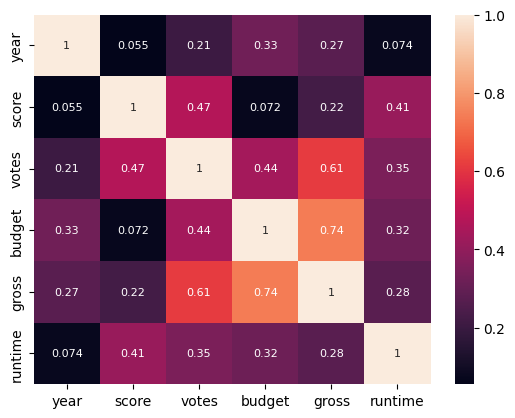

In [ ]:
correlations = df.corr()
sns.heatmap(correlations, annot=True, annot_kws={'fontsize': 8})
plt.show()

In [ ]:
df

,name,genre,year,score,votes,director,star,budget,gross,company,runtime
0,The Shining,Drama,1980,8.4,927000.0,Stanley Kubrick,Jack Nicholson,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,Adventure,1980,5.8,65000.0,Randal Kleiser,Brooke Shields,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,Action,1980,8.7,1200000.0,Irvin Kershner,Mark Hamill,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,Comedy,1980,7.7,221000.0,Jim Abrahams,Robert Hays,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,Comedy,1980,7.3,108000.0,Harold Ramis,Chevy Chase,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,Action,2020,6.6,140000.0,Adil El Arbi,Will Smith,90000000.0,426505244.0,Columbia Pictures,124.0
7649,Sonic the Hedgehog,Action,2020,6.5,102000.0,Jeff Fowler,Ben Schwartz,85000000.0,319715683.0,Paramount Pictures,99.0
7650,Dolittle,Adventure,2020,5.6,53000.0,Stephen Gaghan,Robert Downey Jr.,175000000.0,245487753.0,Universal Pictures,101.0
7651,The Call of the Wild,Adventure,2020,6.8,42000.0,Chris Sanders,Harrison Ford,135000000.0,111105497.0,20th Century Studios,100.0


In [ ]:
# One-hot encoding categorical variables
df_encoded = pd.get_dummies(df, columns=['genre', 'director', 'star', 'company'])

In [ ]:
# Scaling the continuous variables
scaler = StandardScaler()
df_encoded[['votes', 'runtime', 'budget', 'gross']] = scaler.fit_transform(
    df_encoded[['votes', 'runtime', 'budget', 'gross']])

In [ ]:
df_encoded

,name,year,score,votes,budget,gross,runtime,genre_Action,genre_Adventure,genre_Animation,...,company_Zentropa Entertainments,company_Zeta Entertainment,company_Zoetrope Studios,company_Zucker Brothers Productions,company_double A Films,company_erbp,company_i am OTHER,company_i5 Films,company_micro_scope,company_thefyzz
0,The Shining,1980,8.4,4.407390,-0.407925,-0.299554,2.088134,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,The Blue Lagoon,1980,5.8,-0.271200,-0.756896,-0.236205,-0.229469,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Star Wars: Episode V - The Empire Strikes Back,1980,8.7,5.889124,-0.431992,2.326337,0.874151,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Airplane!,1980,7.7,0.575506,-0.780963,-0.104742,-1.112365,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Caddyshack,1980,7.3,-0.037813,-0.720796,-0.337777,-0.560555,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,2020,6.6,0.135870,1.300828,1.728510,0.874151,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7649,Sonic the Hedgehog,2020,6.5,-0.070378,1.180493,1.157832,-0.505374,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7650,Dolittle,2020,5.6,-0.336331,3.346519,0.761161,-0.395012,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7651,The Call of the Wild,2020,6.8,-0.396034,2.383841,0.043029,-0.450193,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Splitting the data into training and testing sets
X_train = df_encoded.drop(labels=['name', 'score'], axis=1)
y_train = df_encoded['score']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=1)

In [ ]:
# Fitting the KNN classifier
knn = KNeighborsRegressor(n_neighbors=5)

X_train = df_encoded.drop(labels=['name', 'score', 'budget', 'gross', 'votes', 'runtime'], axis=1)
y_train = df_encoded['score']
knn.fit(X_train, y_train)


KNeighborsRegressor()

In [ ]:
# Function to get similar movies
def get_similar_movies(movie_name, n_movies=5):
    movie = df_encoded[df_encoded['name'] == movie_name]
    if len(movie) == 0:
        print("Sorry, the movie is not in the dataset.")
        return None
    else:
        indices = knn.kneighbors(movie.drop(labels=['name', 'score', 'budget', 'gross', 'votes', 'runtime'], axis=1), n_neighbors=n_movies+1, return_distance=False)[0][1:]
        similar_movies = df_encoded.iloc[indices]
        return similar_movies['name'].values

In [ ]:
# Taking a movie name as input
movie_name = input("Enter a movie name: ")

# Fitting the KNN regressor
knn2 = KNeighborsRegressor(n_neighbors=5)
X_train = df_encoded.drop(labels=['name', 'score'], axis=1)
y_train = df_encoded['score']
knn2.fit(X_train, y_train)

# Generating similar movies
similar_movies = get_similar_movies(movie_name)
if similar_movies is not None:
    print("Recommended movies:")
    for i, movie in enumerate(similar_movies):
        print(f"{i+1}. {movie}")

Enter a movie name: Avatar
Recommended movies:
1. Dragonball Evolution
2. X-Men Origins: Wolverine
3. Knight and Day
4. Clash of the Titans
5. Jumper


In [ ]:
empty_df = pd.DataFrame()
for i, movie in enumerate(similar_movies):
    new_row = df[df['name'] == movie]
    empty_df = empty_df.append(new_row, ignore_index=True)

empty_df

<ipython-input-26-b8218b37a5d4>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty_df = empty_df.append(new_row, ignore_index=True)


,name,genre,year,score,votes,director,star,budget,gross,company,runtime
0,Murder at 1600,Action,1997,6.1,29000.0,Dwight H. Little,Wesley Snipes,40000000.0,2.580471e+07,Warner Bros.,107.0
1,Vampires,Action,1998,6.1,55000.0,John Carpenter,James Woods,20000000.0,2.030877e+07,Largo Entertainment,108.0
2,The Avengers,Action,1998,3.8,41000.0,Jeremiah S. Chechik,Ralph Fiennes,60000000.0,2.338494e+07,Warner Bros.,89.0
3,The Avengers,Action,2012,8.0,1300000.0,Joss Whedon,Robert Downey Jr.,220000000.0,1.518816e+09,Marvel Studios,143.0
4,Mercury Rising,Action,1998,6.1,70000.0,Harold Becker,Bruce Willis,60000000.0,9.310729e+07,Universal Pictures,111.0
5,The Negotiator,Action,1998,7.3,134000.0,F. Gary Gray,Samuel L. Jackson,50000000.0,4.454768e+07,New Regency Productions,140.0


In [ ]:
df[df_encoded['name'] == movie_name]

,name,genre,year,score,votes,director,star,budget,gross,company,runtime
3252,Blade,Action,1998,7.1,252000.0,Stephen Norrington,Wesley Snipes,45000000.0,131183530.0,Amen Ra Films,120.0


In [ ]:
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
print(f"R^2 score: {r2_score(y_test, y_pred)}")
print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")

R^2 score: 0.45000995937432153
Mean squared error: 0.49573054949947754


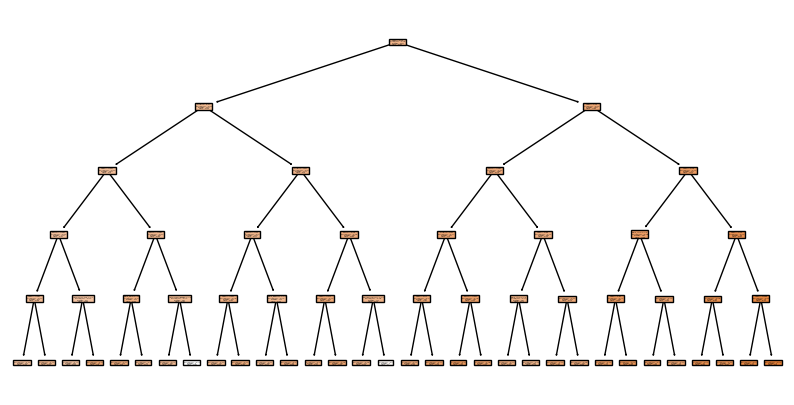

In [ ]:
plt.figure(figsize=(10,5))
plot_tree(dt, filled=True, feature_names=X_train.columns)
plt.show()

In [ ]:
# Function to get similar movies using the decision tree model
def get_similar_movies_dt(movie_name, n_movies=5):
    movie = movies[movies['name'] == movie_name]
    if len(movie) == 0:
        print("Sorry, the movie is not in the dataset.")
        return None
    else:
        indices = dt.predict(df_encoded[df_encoded.columns.difference(['name', 'score'])].loc[movie.index])
        indices = np.argsort(abs(indices - movie['score'].values))[:n_movies]
        similar_movies = df_encoded.iloc[indices]
        return similar_movies['name'].values


In [ ]:
# Taking a movie name as input
movie_name = input("Enter a movie name: ")

Enter a movie name: The Shining


In [ ]:
# Generating similar movies using the decision tree model
similar_movies = get_similar_movies_dt(movie_name)
if similar_movies is not None:
    print("Recommended movies:")
    for i, movie in enumerate(similar_movies):
        print(f"{i+1}. {movie}")

ValueError: ignored